In [35]:
# Preprocessing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from warnings import filterwarnings

# Machine Learning libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor
from sklearn.metrics import mean_squared_error

import joblib

In [36]:
custrew = pd.read_csv("../data/processed/custrew.csv")
top_books = pd.read_csv("../data/processed/top_books.csv")
data = pd.read_csv("../data/processed/data.csv")

In [37]:
# regresyonlar
dtr = DecisionTreeRegressor()
svr = SVR()
abr = AdaBoostRegressor()
rfr = RandomForestRegressor()

# ön işleyiciler
mms = MinMaxScaler()
label_encoder = LabelEncoder()

# modeller
models = {
    "DTR": dtr,
    "SVR": svr,
    "ABR": abr,
    "RFR": rfr,
}

# uyarı kapatıcı
filterwarnings("ignore")

In [38]:
custrew.head(2)

,book name,review title,reviewer,reviewer rating,review description,date,ASIN,title length
0,the woman in me,unbelievably impressive. her torn life on paper.,murderess marbie,4,i'm only a third way in. shipped lightening fa...,26-10-2023,1668009048,7
1,the woman in me,what a heartbreaking story,l j,5,"""there have been so many times when i was scar...",06-11-2023,1668009048,4


In [39]:
top_books.head(2)

,book title,book price,rating,author,year of publication,genre,first_name,last_name,count genre,id
0,"iron flame (the empyrean, 2)",18.42,4.1,rebecca yarros,2023,fantasy romance,rebecca,yarros,2,1649374178
1,the woman in me,20.93,4.5,britney spears,2023,memoir,britney,spears,1,1668009048


In [40]:
data.head(2)

,book name,review title,reviewer,reviewer rating,review description,date,ASIN,title length,Rank,book price,...,last_name,count genre,day,month,year,season,quarter,title sentiment result,desc sentiment result,year diff
0,the woman in me,unbelievably impressive. her torn life on paper.,murderess marbie,4,i'm only a third way in. shipped lightening fa...,26-10-2023,1668009048,7,2,20.93,...,spears,1,26,10,2023,Autumn,4,Pozitif,Pozitif,0
1,the woman in me,what a heartbreaking story,l j,5,"""there have been so many times when i was scar...",06-11-2023,1668009048,4,2,20.93,...,spears,1,6,11,2023,Autumn,4,Negatif,Negatif,0


In [41]:
data.select_dtypes(include=["int","float"])

,reviewer rating,title length,Rank,book price,rating,year of publication,count genre,day,month,year,quarter,year diff
0,4,7,2,20.93,4.5,2023,1,26,10,2023,4,0
1,5,4,2,20.93,4.5,2023,1,6,11,2023,4,0
2,5,18,2,20.93,4.5,2023,1,1,11,2023,4,0
3,5,4,2,20.93,4.5,2023,1,25,10,2023,4,0
4,5,6,2,20.93,4.5,2023,1,1,11,2023,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
571,5,2,99,12.99,4.6,2015,1,10,9,2023,3,8
572,5,3,99,12.99,4.6,2015,1,10,9,2023,3,8
573,5,6,99,12.99,4.6,2015,1,1,10,2023,4,8
574,5,6,99,12.99,4.6,2015,1,18,9,2023,3,8


In [42]:
data[["season","title sentiment result","desc sentiment result"]]

,season,title sentiment result,desc sentiment result
0,Autumn,Pozitif,Pozitif
1,Autumn,Negatif,Negatif
2,Autumn,Pozitif,Negatif
3,Autumn,Negatif,Pozitif
4,Autumn,Pozitif,Pozitif
...,...,...,...
571,Autumn,Pozitif,Pozitif
572,Autumn,Nötr,Negatif
573,Autumn,Pozitif,Nötr
574,Autumn,Negatif,Pozitif


In [43]:
data[["autumn","spring","summer","winter"]] = pd.get_dummies(data['season'],dtype="int")

In [44]:
data['title sentiment encoded'] = label_encoder.fit_transform(data['title sentiment result'])
data["desc sentiment encoded"] = label_encoder.fit_transform(data["desc sentiment result"])

## X Y değerleri tanımlandı

In [45]:
x = data.select_dtypes(include=["int","float"])[["title length","book price","year diff",
                                             "count genre","autumn","spring","summer",
                                             "winter","title sentiment encoded","desc sentiment encoded"]]

y = data["rating"]

In [46]:
x_train, y_train, x_test, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Modeller eğitildi 

In [47]:
pred_dict = {}

for model_adı, model in models.items():
    model.fit(x_train, x_test)
    pred_dict[f"{model_adı} pred"] = model.predict(y_train)
    pred_dict[f"{model_adı} err"] = mean_squared_error(y_test, pred_dict[f"{model_adı} pred"])
    
    print(pred_dict[f"{model_adı} err"])

0.0024137931034482712
0.01340702244970439
0.008945564455032
0.00023013793103444585


In [48]:
pred_dict

{'DTR pred': array([4.8, 4.8, 4.8, 4.7, 4.4, 4.4, 4.6, 4.8, 4.6, 4.8, 4.8, 4.7, 4.9,
        4.3, 4.2, 4.5, 4.6, 4.5, 4.9, 4.7, 4.7, 4.6, 4.4, 4.7, 4.9, 4.8,
        4.8, 4.8, 4.8, 4.8, 4.7, 4.9, 4.6, 4.7, 4.7, 4.6, 4.4, 4.6, 4.5,
        4.5, 4.7, 4.5, 4.8, 4.8, 4.5, 4.6, 4.9, 4.9, 4.8, 4.6, 4.9, 4.6,
        4.6, 4.8, 4.8, 4.7, 4.8, 4.4, 4.7, 4.6, 4.8, 4.6, 4.3, 4.8, 4.8,
        4.6, 4.7, 4.8, 4.8, 4.7, 4.8, 4.7, 4.4, 4.8, 4.8, 4.6, 4.9, 4.9,
        4.8, 4.6, 4.9, 4.6, 4.8, 4.7, 4.6, 4.8, 4.7, 4.5, 4.6, 4.8, 4.6,
        4.6, 4.6, 4.7, 4.8, 4.6, 4.9, 4.8, 4.8, 4.7, 4.7, 4.8, 4.8, 4.6,
        4.8, 4.9, 4.9, 4.7, 4.7, 4.6, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8]),
 'DTR err': 0.0024137931034482712,
 'SVR pred': array([4.72265149, 4.73891382, 4.80305124, 4.63285346, 4.59072987,
        4.5999308 , 4.70585184, 4.64945343, 4.50187984, 4.7480447 ,
        4.78718087, 4.60603871, 4.79982282, 4.39428625, 4.74924383,
        4.63916068, 4.68877003, 4.68681423, 4.9145293 , 4.69422025,
        4.80107

## Sonuçlar

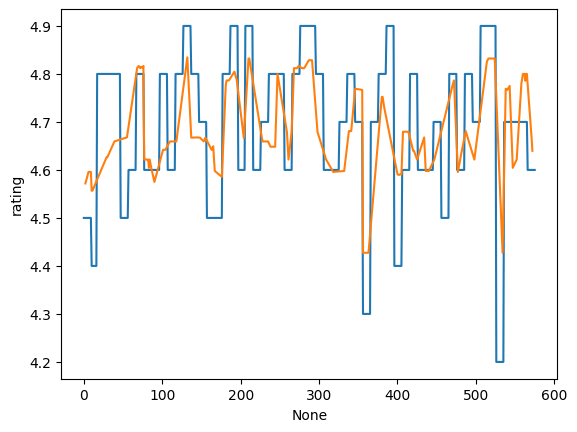

In [49]:
sbn.lineplot(x=data.index,y=data["rating"]);
sbn.lineplot(x=y_test.index,y=pred_dict['ABR pred']);

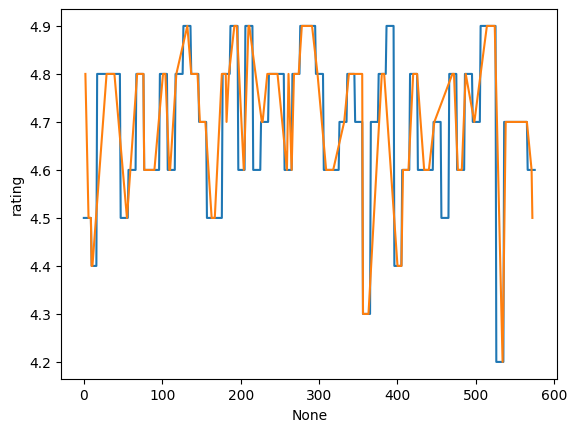

In [50]:
sbn.lineplot(x=data.index,y=data["rating"]);
sbn.lineplot(x=y_test.index,y=pred_dict['DTR pred']);

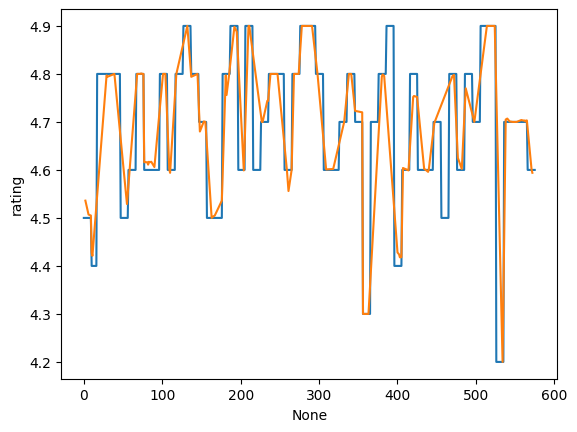

In [51]:
sbn.lineplot(x=data.index,y=data["rating"]);
sbn.lineplot(x=y_test.index,y=pred_dict['RFR pred']);

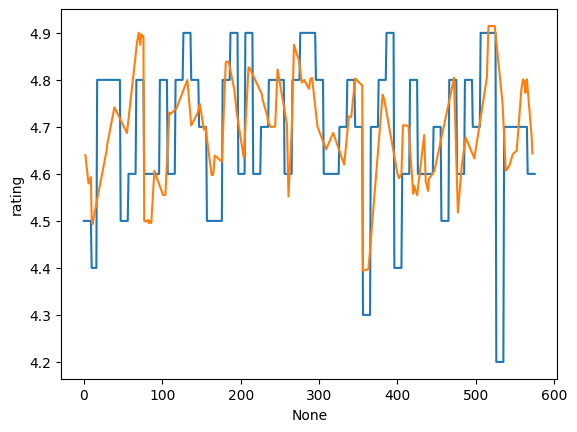

In [52]:
sbn.lineplot(x=data.index,y=data["rating"]);
sbn.lineplot(x=y_test.index,y=pred_dict['SVR pred']);

# Model anlamlandırması

In [53]:
pred_dict['RFR pred']

array([4.744, 4.8  , 4.723, 4.7  , 4.424, 4.428, 4.599, 4.797, 4.611,
       4.794, 4.795, 4.698, 4.9  , 4.3  , 4.2  , 4.505, 4.6  , 4.529,
       4.9  , 4.701, 4.703, 4.606, 4.418, 4.7  , 4.9  , 4.536, 4.8  ,
       4.752, 4.8  , 4.801, 4.703, 4.9  , 4.6  , 4.706, 4.7  , 4.616,
       4.427, 4.616, 4.507, 4.594, 4.7  , 4.5  , 4.796, 4.8  , 4.503,
       4.594, 4.9  , 4.888, 4.8  , 4.6  , 4.9  , 4.602, 4.599, 4.794,
       4.744, 4.7  , 4.8  , 4.418, 4.756, 4.617, 4.8  , 4.616, 4.3  ,
       4.536, 4.8  , 4.596, 4.68 , 4.8  , 4.754, 4.703, 4.798, 4.7  ,
       4.421, 4.8  , 4.797, 4.601, 4.9  , 4.9  , 4.556, 4.617, 4.9  ,
       4.604, 4.795, 4.703, 4.602, 4.8  , 4.707, 4.505, 4.602, 4.8  ,
       4.599, 4.616, 4.602, 4.701, 4.799, 4.601, 4.9  , 4.8  , 4.794,
       4.704, 4.7  , 4.8  , 4.8  , 4.616, 4.752, 4.9  , 4.898, 4.705,
       4.701, 4.625, 4.77 , 4.8  , 4.72 , 4.8  , 4.8  , 4.8  ])

In [54]:
models['RFR'].get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

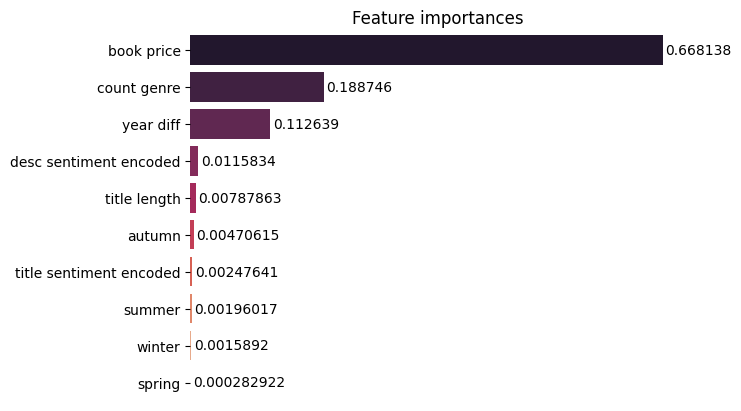

In [55]:
features_df = pd.DataFrame({'features': models['RFR'].feature_names_in_,
                            'importances': models['RFR'].feature_importances_ })

features_df_sorted = features_df.sort_values(by='importances', ascending=False)

g = sbn.barplot(data=features_df_sorted, x='importances', y ='features', palette="rocket")
sbn.despine(bottom = True, left = True)
g.set_title('Feature importances')
g.set(xlabel=None)
g.set(ylabel=None)
g.set(xticks=[])
for value in g.containers:
    g.bar_label(value, padding=2)

# Model önişlem ve eğitim hattı

In [ ]:
from sklearn.pipeline import Pipeline



# Model Kayıt

In [27]:
for model_adı, model in models.items():
    dosya_adı = f"{model_adı}_model.pkl"
    joblib.dump(model, "../models/"+dosya_adı)

# Manuel değerlendirme ve harici veri tahmini

In [81]:
# İnsanlığımı yitirirken Osamu Dazai genel rating tahmini
# predict sırasında yorumlardaki verilerden faydalanıyoruz yani her bir yorumdaki yıl verisi, yorumdaki açıklamanın olumlu olup olmaması yorumun başlığının karakter sayısı ve 
# # olumlu olup olmaması gibi verileri giriyoruz tek bir yorumdan elde ettiğimiz yorumlar ve kitap hakkindaki verilerden ratingi tahmin edip kitabın 
# # tutup tutmayacağını tahmin edebiliriz :)

print(models['RFR'].predict([[12,36.30,1,3,1,0,0,0,2,2]]))
print(models['RFR'].predict([[12,36.30,1,3,1,0,0,0,0,0]]))
print(models['RFR'].predict([[12,36.30,1,3,1,0,0,0,0,1]]))

[4.783]
[4.765]
[4.778]
